In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from algorithms import *
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import time
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dsl_data/development.csv')
df_eval = pd.read_csv('dsl_data/evaluation.csv')

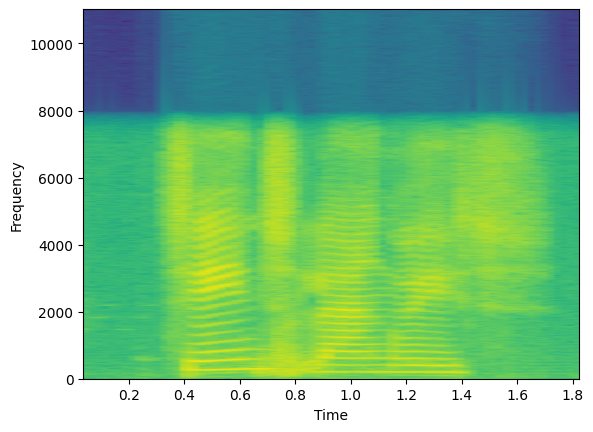

In [4]:
def plot_spectrogram(path, window_size=2048, hop_length=512):
    y, sr = librosa.load(path)
    plt.specgram(y, NFFT=window_size, Fs=sr, noverlap=window_size-hop_length)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

plot_spectrogram(df['path'][0])

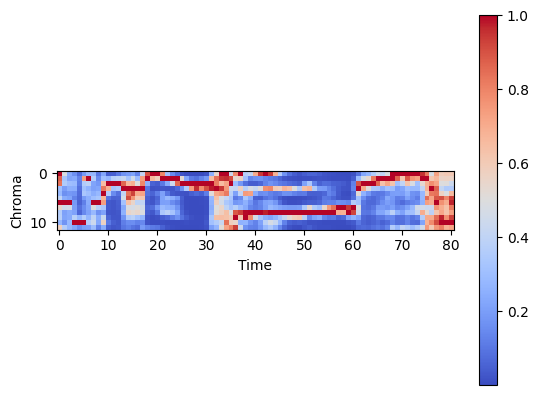

In [5]:
def plot_chroma(path, hop_length=512):
    y, sr = librosa.load(path)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    plt.imshow(chroma, cmap='coolwarm', interpolation='nearest')
    plt.xlabel('Time')
    plt.ylabel('Chroma')
    plt.colorbar()
    plt.show()
plot_chroma(df['path'][0])

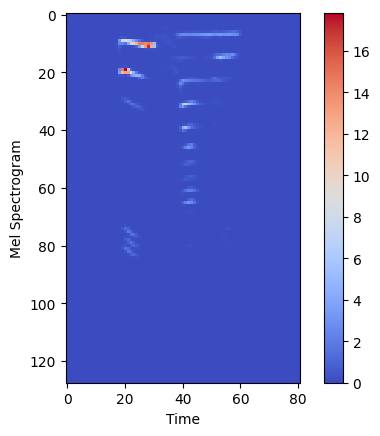

In [6]:
def plot_mel_spectrogram(path, n_mels=128, hop_length=512):
    y, sr = librosa.load(path)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length)
    plt.imshow(mel_spectrogram, cmap='coolwarm', interpolation='nearest')
    plt.xlabel('Time')
    plt.ylabel('Mel Spectrogram')
    plt.colorbar()
    plt.show()
plot_mel_spectrogram(df['path'][0])

In [3]:
cols = ['Id','Self-reported fluency level ', 'First Language spoken', 'Current language used for work/school']
df.drop(columns=cols,inplace=True)
df_eval.drop(columns=cols,inplace=True)

In [3]:
df['intent'] = df['action'] + df['object']
dict = {}
for i, el in enumerate(df['intent'].unique()):
    dict[el] = i

df['intent'] = df['intent'].apply(lambda x: dict[x])

In [12]:
for i in ['gender', 'ageRange', 'speakerId']:
    label_encoder(df,i)
    label_encoder(df_eval,i)

In [4]:
y = df['intent']

In [21]:
new_columns = ['action', 'object', 'intent']
df.drop(columns = new_columns, inplace=True)

In [23]:
audio_feature_extraction(df)
audio_feature_extraction(df_eval)

In [24]:
chroma_feature(df)
chroma_feature(df_eval)

time_domain_2D(df,'chroma')
time_domain_2D(df_eval,'chroma')

arr = ['chroma_mean','chroma_min','chroma_max','chroma_std','chroma_kurtosis','chroma_skew']
for i in arr:
    array_column_spread(df,i)
    array_column_spread(df_eval,i)

In [25]:
tonnetz_feature(df)
tonnetz_feature(df_eval)

time_domain_2D(df,'tonnetz')
time_domain_2D(df_eval,'tonnetz')

arr = ['tonnetz_mean','tonnetz_min','tonnetz_max','tonnetz_std','tonnetz_kurtosis','tonnetz_skew']
for i in arr:
    array_column_spread(df,i)
    array_column_spread(df_eval,i)

/Users/sidani/Development/NLP-Intent-detection/venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=641
  return f(*args, **kwargs)


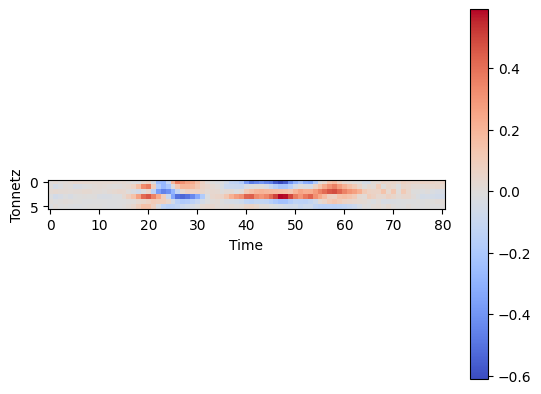

In [7]:
def plot_tonnetz(path, hop_length=512):
    y, sr = librosa.load(path)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr, hop_length=hop_length)
    plt.imshow(tonnetz, cmap='coolwarm', interpolation='nearest')
    plt.xlabel('Time')
    plt.ylabel('Tonnetz')
    plt.colorbar()
    plt.show()
plot_tonnetz(df['path'][0])

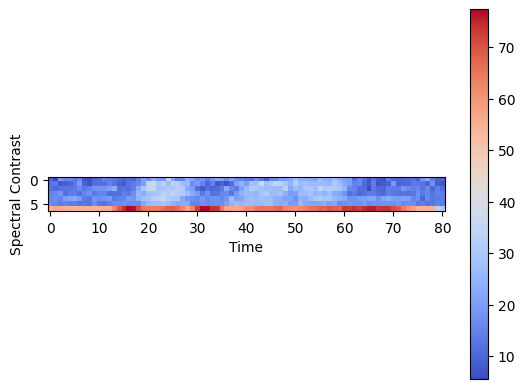

In [8]:
def plot_spectral_contrast(path, hop_length=512):
    y, sr = librosa.load(path)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr, hop_length=hop_length)
    plt.imshow(contrast, cmap='coolwarm', interpolation='nearest')
    plt.xlabel('Time')
    plt.ylabel('Spectral Contrast')
    plt.colorbar()
    plt.show()
plot_spectral_contrast(df['path'][0])

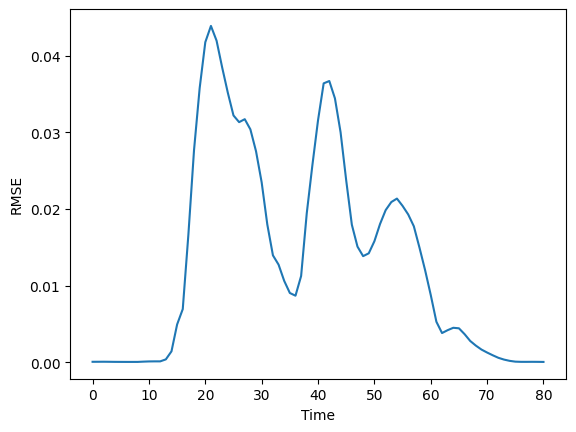

In [10]:
def plot_rmse(path, hop_length=512):
    y, sr = librosa.load(path)
    rmse = librosa.feature.rms(y=y, hop_length=hop_length)
    plt.plot(rmse[0])
    plt.xlabel('Time')
    plt.ylabel('RMSE')
    plt.show()
plot_rmse(df['path'][0])

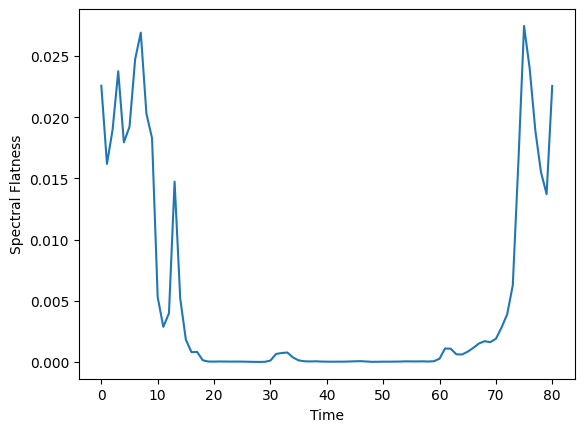

In [11]:
def plot_spectral_flatness(path, hop_length=512):
    y, sr = librosa.load(path)
    flatness = librosa.feature.spectral_flatness(y=y, hop_length=hop_length)
    plt.plot(flatness[0])
    plt.xlabel('Time')
    plt.ylabel('Spectral Flatness')
    plt.show()
plot_spectral_flatness(df['path'][0])


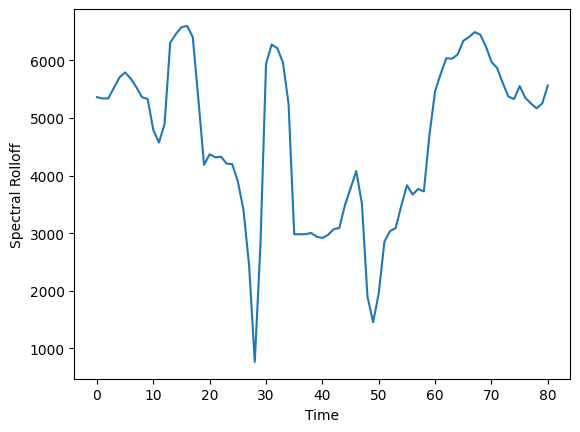

In [12]:
def plot_spectral_rolloff(path, hop_length=512):
    y, sr = librosa.load(path)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length)
    plt.plot(rolloff[0])
    plt.xlabel('Time')
    plt.ylabel('Spectral Rolloff')
    plt.show()
plot_spectral_rolloff(df['path'][0])


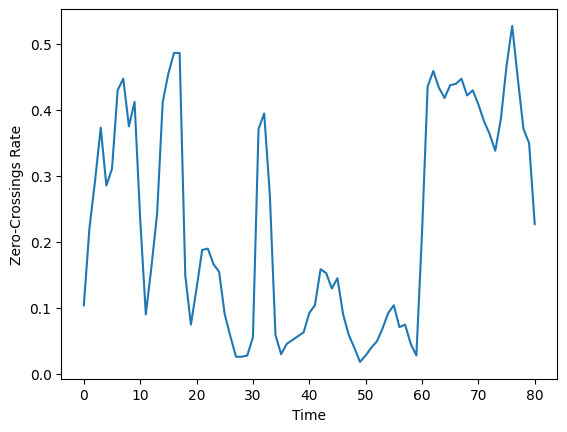

In [13]:
def plot_zero_crossings(path, hop_length=512):
    y, sr = librosa.load(path)
    zero_crossings = librosa.feature.zero_crossing_rate(y=y, frame_length=hop_length)
    plt.plot(zero_crossings[0])
    plt.xlabel('Time')
    plt.ylabel('Zero-Crossings Rate')
    plt.show()
plot_zero_crossings(df['path'][0])


In [26]:
spectral_contrast(df)
spectral_contrast(df_eval)

time_domain_2D(df,'spectral_contrast')
time_domain_2D(df_eval,'spectral_contrast')

arr = ['spectral_contrast_mean','spectral_contrast_min','spectral_contrast_max','spectral_contrast_std','spectral_contrast_kurtosis','spectral_contrast_skew']
for i in arr:
    array_column_spread(df,i)
    array_column_spread(df_eval,i)

/Users/sidani/Development/NLP-Intent-detection/algorithms/utils.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[['{}_{}'.format(column_name, i) for i in range(len(df[column_name].iloc[0]))]] = df[column_name].apply(lambda x: pd.Series(x))
/Users/sidani/Development/NLP-Intent-detection/algorithms/utils.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[['{}_{}'.format(column_name, i) for i in range(len(df[column_name].iloc[0]))]] = df[column_name].apply(lambda x: pd.Series(x))
/Users/sidani/Development/NLP-Intent-detec

In [27]:
rmse_feature(df)
rmse_feature(df_eval)

time_domain_1D(df,'rmse')
time_domain_1D(df_eval,'rmse')

/Users/sidani/Development/NLP-Intent-detection/algorithms/librosa_features.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rmse'] = rmse_list
/Users/sidani/Development/NLP-Intent-detection/algorithms/librosa_features.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rmse'] = rmse_list
/Users/sidani/Development/NLP-Intent-detection/algorithms/utils.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

In [31]:
mfcc_feature(df)
mfcc_feature(df_eval)
time_domain_2D(df,'mfcc')
time_domain_2D(df_eval,'mfcc')

arr = ['mfcc_mean','mfcc_min','mfcc_max','mfcc_std','mfcc_kurtosis','mfcc_skew']
for i in arr:
    array_column_spread(df,i)
    array_column_spread(df_eval,i)

/Users/sidani/Development/NLP-Intent-detection/algorithms/librosa_features.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['mfcc'] = mfcc_array
/Users/sidani/Development/NLP-Intent-detection/algorithms/librosa_features.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['mfcc'] = mfcc_array
/Users/sidani/Development/NLP-Intent-detection/algorithms/utils.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

In [32]:
# Iterate over each column in the DataFrame
for col in df.columns:
    # Check if the column contains 1D or 2D arrays
    if isinstance(df[col].values[0], (list, np.ndarray)) and len(df[col].values[0]) > 1:
        # Drop the column if it contains 1D or 2D arrays
        df.drop(col, axis=1, inplace=True)
for col in df_eval.columns:
    # Check if the column contains 1D or 2D arrays
    if isinstance(df_eval[col].values[0], (list, np.ndarray)) and len(df_eval[col].values[0]) > 1:
        # Drop the column if it contains 1D or 2D arrays
        df_eval.drop(col, axis=1, inplace=True)

In [5]:
X = df.copy()
X_eval = df_eval.copy()

In [7]:
X = pd.read_csv('new_df.csv')
X_eval = pd.read_csv('new_df_eval.csv')

In [8]:
X.drop(columns=['path','speakerId','rate'],inplace=True)
X_eval.drop(columns=['path','speakerId','rate'],inplace=True)

In [9]:
X

,gender,ageRange,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_min_0,...,mfcc_skew_20,mfcc_skew_21,mfcc_skew_22,mfcc_skew_23,mfcc_skew_24,mfcc_skew_25,mfcc_skew_26,mfcc_skew_27,mfcc_skew_28,mfcc_skew_29
0,0,0,0.326633,0.425558,0.609273,0.551732,0.330019,0.401141,0.553361,0.006815,...,-0.531570,0.504491,1.140147,2.296258,1.642185,2.278633,2.455645,2.221397,-0.677938,-0.530103
1,0,0,0.721402,0.498639,0.396650,0.390586,0.399010,0.474436,0.638910,0.111028,...,-0.666427,0.493483,-0.136062,-0.012499,-1.169995,-0.456336,0.323684,1.401942,1.635610,1.438762
2,0,0,0.629236,0.537964,0.552273,0.413578,0.480184,0.466011,0.564523,0.007807,...,-0.299374,0.527516,0.069621,1.433793,1.677998,0.639353,0.271467,-0.765648,-0.406806,0.965866
3,0,0,0.577373,0.642918,0.544070,0.503560,0.583369,0.578246,0.481053,0.019653,...,-0.933818,-0.714182,-0.702362,-0.697031,-1.270099,1.761092,2.039311,1.511893,1.603247,1.307590
4,0,0,0.595173,0.569174,0.568863,0.447454,0.456548,0.573528,0.669609,0.017559,...,-0.972144,-1.082262,-1.634677,-1.023076,1.553642,1.745632,1.570869,1.405110,2.386209,0.318543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,1,0,0.679434,0.594778,0.631193,0.746593,0.774729,0.718480,0.697543,0.004399,...,-1.003859,-0.293297,-0.057998,-1.363747,-0.641923,-0.600933,-0.529341,-0.503948,-1.386683,-0.639145
9850,1,0,0.680408,0.618760,0.603353,0.692942,0.745589,0.723599,0.633732,0.038680,...,-0.841699,-0.219877,-0.410410,0.345684,-0.685485,-0.863833,-0.561868,-0.635491,-0.753730,-0.415371
9851,1,0,0.620433,0.596544,0.628544,0.665169,0.705955,0.767637,0.748518,0.022329,...,-1.212383,1.045583,-0.271043,-0.627334,-0.835144,-0.643728,-0.589214,-0.949763,-1.252950,-0.334208
9852,1,0,0.762749,0.692650,0.748023,0.780065,0.757239,0.787803,0.826896,0.114353,...,-0.544328,0.235876,-1.200989,0.564758,-1.225836,-0.969769,-1.285757,-1.080278,-0.447718,-0.882365


In [10]:
X =  normalize_dataframe(X)
X_eval = normalize_dataframe(X_eval)

In [21]:
top_n_features = select_top_n_features(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	308
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	308
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	308
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	308
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	308
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	308
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	308
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	105
Tentative: 	106
Rejected: 	97
Iteration: 	9 / 100
Confirmed: 	105
Tentative: 	106
Rejected: 	97
Iteration: 	10 / 100
Confirmed: 	105
Tentative: 	106
Rejected: 	97
Iteration: 	11 / 100
Confirmed: 	105
Tentative: 	106
Rejected: 	97
Iteration: 	12 / 100
Confirmed: 	114
Tentative: 	97
Rejected: 	97
Iteration: 	13 / 100
Confirmed: 	114
Tentative: 	87
Rejected: 	107
Iteration: 	14 / 100
Confirmed: 	114
Tentative: 	87
Rejected: 	107
Iteration: 	15 / 100
Confirmed: 	114
Tentative: 	87
Rejected: 	107
Iteration: 	16 / 100
Confi

In [23]:
from sklearn.feature_selection import RFE

def select_top_n_features(X, y, n_features):
    # initialize the SVM model
    svm = SVC()
    # initialize RFE
    feat_selector = RFE(svm, n_features_to_select=n_features)
    # fit RFE
    feat_selector.fit(X, y)
    # get the selected feature mask
    mask = feat_selector.support_
    # apply the mask to the dataframe to get the top n features
    top_n_features = X.columns[mask]
    return top_n_features


top_n_features = select_top_n_features(X, y, 80)

ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [33]:
def new_svm_model(X_train, y_train, X_test):
    clf = SVC(kernel = 'rbf', C=10, gamma=0.01)
    # train the model on the training data
    clf.fit(X_train, y_train)
    # predict the target values for the test data
    # returning the y_predict
    return clf.predict(X_test)
y_pred = new_svm_model(X[top_n_features], y, X_eval[top_n_features])

In [34]:
key_mapping = np.vectorize(lambda x: next(key for key, value in dict.items() if value == x))
keys_arr = key_mapping(y_pred)

In [35]:
y_evaluation_df = pd.DataFrame(keys_arr, columns = ['Predicted'])
y_evaluation_df.index.name = 'Id'

In [36]:
from datetime import datetime
now = int(time.time())
readable_time = datetime.fromtimestamp(now).strftime('%H:%M:%S')
y_evaluation_df.to_csv(f'evaluation/copy_predictions-{readable_time}.csv')

In [57]:
# df.to_csv('new_df.csv',index=False)
# df_eval.to_csv('new_df_eval.csv',index=False)